In [32]:
# !pip install h5py
import math

In [1]:
from sklearn.metrics import log_loss

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import h5py
from sklearn.metrics import accuracy_score

In [17]:
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)


In [39]:
def model(X,W,b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))

    return A

In [5]:
def log_loss(A,y):
    epsinol = 1e-10
    return 1/len(y) *np.sum(-y*np.log(A + epsinol)-(1-y)*np.log(1-A + epsinol))
    

In [6]:
def gradients(A,X,y):
    return (1/len(y)  * np.dot(X.T,(A - y)) , 1/len(y) * np.sum(A-y))


In [7]:
def update(W,b,dW,db,learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W , b)

In [28]:
def predict(X,W,b):
    A = model(X,W,b)
    #print(A)
    return A>= 0.5

In [70]:
def artificial_neuron(X_train ,y_train,X_test ,y_test ,learning_rate = 0.01 ,n_iter = 100):
    #tqdm : progress
    from tqdm import tqdm
    # Initialisation de W et b
    W , b = initialisation(X_train)
    # Etat d'optimisation de l'erreur
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    for i in tqdm(range(n_iter)):
        A = model(X_train,W,b)
        if i%10:
            #Train
            #calcul du cout : 
            train_loss.append( log_loss(A,y_train))
            #calcul de l'accuracy :
            y_pred = predict(X_train,W,b)
            train_acc.append(accuracy_score(y_train,y_pred))
            #Test
            A_test = model(X_test,W,b)
            test_loss.append( log_loss(A_test,y_test))
            y_pred = predict(X_test,W,b)
            test_acc.append(accuracy_score(y_test,y_pred))
        #mise a jour :
        dW , db = gradients(A,X_train,y_train)
        W , b = update(W,b,dW,db,learning_rate)
    
    #print(accuracy_score(y,y_pred))
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label='train loss')
    plt.plot(test_loss,label='test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc,label='train Accuracy')
    plt.plot(test_acc,label='train Accuracy')
    plt.legend()
    plt.show()
    return (W,b)

In [11]:
def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [12]:
X_train, y_train, X_test, y_test = load_data()

In [13]:
print("Train_Set : ",X_train.shape , y_train.shape ,"\nUnique Classes : ", np.unique(y_train,return_counts=True))

Train_Set :  (1000, 64, 64) (1000, 1) 
Unique Classes :  (array([0., 1.]), array([500, 500], dtype=int64))


In [16]:
print("Test_Set : ",X_test.shape , y_test.shape ,"\nShape of Unique Classes : ", np.unique(y_test,return_counts=True))

Test_Set :  (200, 64, 64) (200, 1) 
Shape of Unique Classes :  (array([0., 1.]), array([100, 100], dtype=int64))


Exemple des images de chiens et chats : 


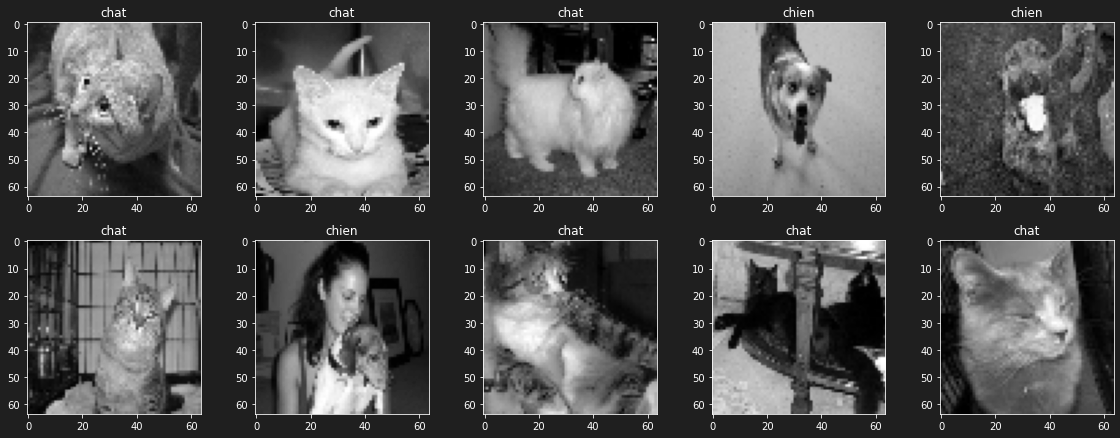

In [18]:
print('Exemple des images de chiens et chats : ')
plt.figure(figsize=(16,12))
cls = {0:'chat', 1:'chien'}
for i in range(1,11):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(cls[ y_train[i][0] ] )
    plt.tight_layout()
plt.show()

**Ce DataSet est composé de 1200 images de chiens et chats, chaque image est de taille 64*64 bits => 4096 variable
en pratique nous stockons chaque image dans une matrice (64 lignes , 64 colonne), pour la présenter a la machine nous devons applatir cette matrice en 1 seul ligne  
et les donner a l'algorithme d'apprentissage pour construire le modèle.**

In [43]:
y_train = pd.Series(y_train[:,0])

*To Do :*
- 1. Normalisation du train_Set et test_Set
- 2. flatten() les variables du train_Set et test_Set
- 3. Entrainer le modèle sur le train_set ( tracer la courbe d'apprentissage, trouver les bons hyper-params)
- 4. Evaluer le modèle sur test_Set(tracer également la courbe de loss pour le test_Set)
- 5. partager vos concolusions dans les commentaires

In [23]:
# Old shape
X_train.shape

(1000, 64, 64)

In [20]:
y_train.shape

(1000, 1)

In [24]:
# new Shape  
X_train_reshape = X_train.reshape(X_train.shape[0],-1)

X_train_reshape.shape

(1000, 4096)

In [22]:
X_test_reshape = X_test.reshape(X_test.shape[0],-1)
X_test_reshape

array([[ 47,  47,  51, ..., 155, 156, 154],
       [130, 148, 125, ..., 114,  77, 117],
       [216, 133, 200, ..., 193, 166, 177],
       ...,
       [ 40,  51, 199, ..., 137, 214, 125],
       [206, 206, 206, ..., 112, 111, 104],
       [110, 101, 117, ..., 102,  34,  55]], dtype=uint8)

In [65]:
#Data Normalization /Feature Scaling:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(X_train_reshape)
minmax_scale = preprocessing.MinMaxScaler().fit(X_test_reshape)
X_train_minmax = minmax_scale.transform(X_train_reshape)
X_test_minmax = minmax_scale.transform(X_test_reshape)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:38<00:00, 101.31it/s]


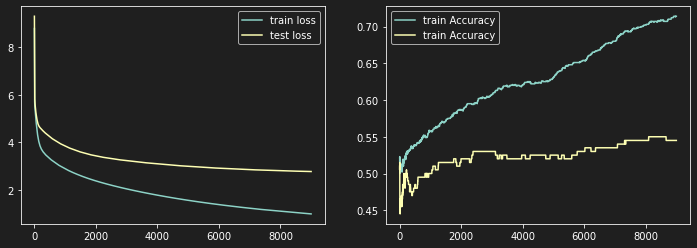

In [72]:
Wf , bf = artificial_neuron(X_train_minmax,y_train ,X_test_minmax,y_test,n_iter=10000)

### Probléme
**ici on ce trouve face aux prébléme d'Overfitting :**
- le modéle ne se généralise pas
- l'amélioration se fait que sur le sens de l'entrainement
### Solutions
- ajouter plus de données '1000 images n'est pas suffisant' 
- réduire le nobre de variables  
- utilisé une technique de régularisation tq la pénalité L1 ou L2 